In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [2]:
# Function to calculate entropy
def calculate_entropy(p):
    if p == 0 or p == 1:
        return 0
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Function to update the plot based on slider value
def update_plot(biasing):
    p = biasing / 100.0
    entropy = calculate_entropy(p)
    
    fig, axs = plt.subplots(2, 1, figsize=(8, 10))
    
    # Plot the probability distribution
    axs[0].bar(['Heads', 'Tails'], [p, 1 - p], color=['blue', 'orange'])
    axs[0].set_title('Probability Distribution', fontsize=16)
    axs[0].set_ylim(0, 1)
    
    # Plot the entropy as a function of biasing
    ps = np.linspace(0, 1, 100)
    entropies = [calculate_entropy(pi) for pi in ps]
    axs[1].plot(ps, entropies, lw=3, label='Entropy')
    axs[1].plot([p], [entropy], "o", ms=10, color='red', fillstyle='none', mew=2)  # Current setting
    axs[1].set_title('Entropy as a Function of Biasing', fontsize=16)
    axs[1].set_xlabel('Probability of Heads', fontsize=14)
    axs[1].set_ylabel('Entropy (bits)', fontsize=14)
    
    plt.tight_layout()
    plt.show()

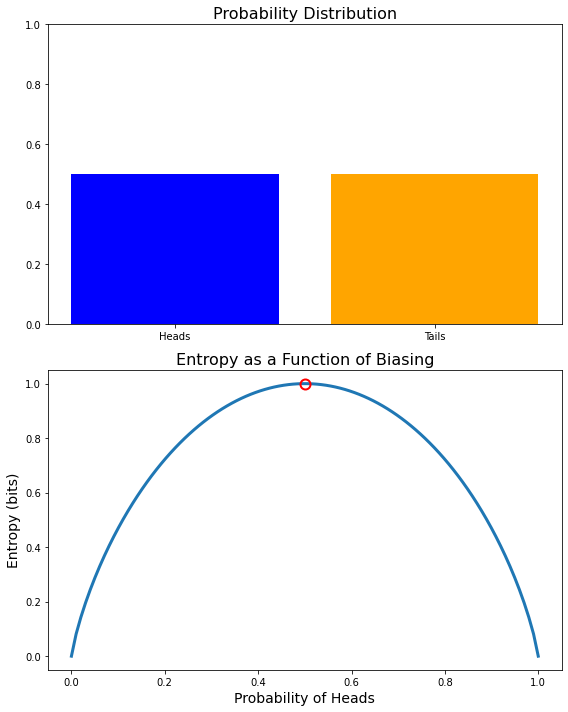

In [4]:
# Create a slider widget
slider = widgets.FloatSlider(
    value=50.0,
    min=0.0,
    max=100.0,
    step=1.0,
    description='Biasing:',
    continuous_update=False
)

# Display the slider and the plot
widgets.interactive(update_plot, biasing=slider)